In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale

%matplotlib inline

In [154]:
#Was having issues with Jupyter so I used Google Colab
url = 'https://raw.githubusercontent.com/Adi-Mehta/PricePredictor/master/test_task.csv?token=AIHNZJNITS6LFMTLC5LT7AC5N4OKK'
data = pd.read_csv(url)

data.isnull().values.any()    #check for NAN values, which there are none

False

In [155]:
data.head(10)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400
5,BMW,335,152352,225,2011-05-01,petrol,black,convertible,True,True,False,False,True,True,True,True,17100
6,BMW,325,205219,145,2009-05-01,diesel,grey,convertible,True,True,False,False,True,True,True,True,12400
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,False,False,False,True,True,False,6100
8,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,False,False,False,True,True,False,6200
9,BMW,320,139541,135,2013-06-01,diesel,white,convertible,False,False,False,False,True,False,True,False,17300


In [156]:
data.registration_date = data.registration_date.str[:4] #would like to change registration_date to just year
data.rename(columns={'registration_date':'year'}, inplace =True)    #change reg date title to just year
data=data.drop(['maker_key','model_key'],axis=1)   #remove maker key since they are all BMW and Model is useless in this instance
data.head()

,mileage,engine_power,year,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price
0,140411,100,2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300
1,13929,317,2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700
2,183297,120,2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200
3,128035,135,2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100
4,97097,160,2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400


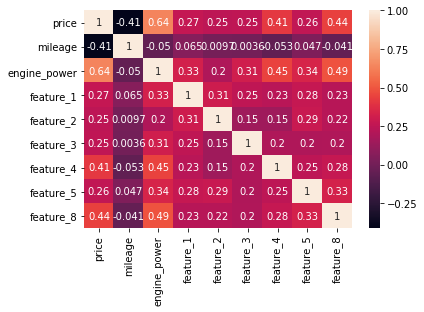

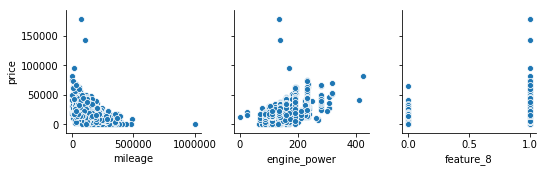

In [157]:
columns =["price","mileage","engine_power","year","fuel","paint_color","car_type", "feature_1","feature_2","feature_3","feature_4","feature_5","feature_8"]
sns.heatmap(data[columns].corr(),annot=True)    #feature 6 and 7 have low correlation values so I dropped them

sns.pairplot(data, 
             x_vars=["mileage","engine_power",'feature_8'], 
             y_vars=["price"],    #determining what variables affect price the most
             )

In [158]:
df = pd.get_dummies(data=data, columns=["fuel","paint_color","car_type"])    #to address categorical variables I created dummy variables
df.head()

,mileage,engine_power,year,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,fuel_diesel,fuel_electro,fuel_hybrid_petrol,fuel_petrol,paint_color_beige,paint_color_black,paint_color_blue,paint_color_brown,paint_color_green,paint_color_grey,paint_color_orange,paint_color_red,paint_color_silver,paint_color_white,car_type_convertible,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van
0,140411,100,2012,True,True,False,False,True,True,True,False,11300,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,13929,317,2016,True,True,False,False,False,True,True,True,69700,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,183297,120,2012,False,False,False,False,True,False,True,False,10200,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,128035,135,2014,True,True,False,False,True,True,True,True,25100,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,97097,160,2014,True,True,False,False,False,True,True,True,33400,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [0]:
X = df.drop(['price'],axis=1)   #remove price from df and scale
X= scale(X)
Y=df['price']    #price is our Y varoalbe

In [160]:
X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size=.3, random_state=0)
regressor=LinearRegression()    #wanted to try a basic linear regression first
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
y_pred=regressor.predict(X_test)
print("Linear Regression R-squared score: {}".format(regressor.score(X_test, y_test)))

print("RMSE score: {}".format(np.sqrt(mean_squared_error(y_pred,y_test))))    #within $4564 of each test value

Linear Regression R-squared score: 0.7296606534256603
RMSE score: 4564.19340947677


In [166]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=32, verbose=0,
                      warm_start=False)

In [167]:
y_pred=rf.predict(X_test)
print("Random Forest Regression R-squared score: {}".format(rf.score(X_test, y_test)))

print("RMSE score: {}".format(np.sqrt(mean_squared_error(y_pred,y_test))))    #within 3546 of all cars in test set

Random Forest Regression R-squared score: 0.8339542026781271
RMSE score: 3577.0363511045275


Text(0.5, 1.0, 'Random Forest')

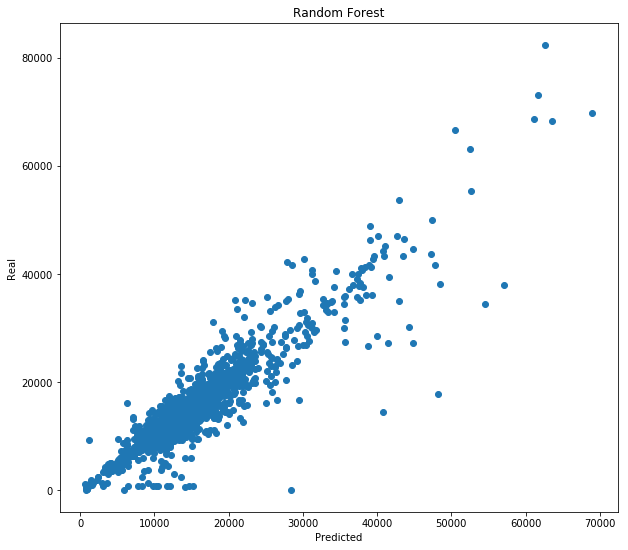

In [165]:
#Using the RF model
plt.figure(figsize=(10,9))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title("Random Forest")